**Traffic Project:**

The dataset provided is a csv fille name traffic. It contains web traffic data ("events") from a few different pages/links over a period of 7 days including various categorical dimensions about the geographic origin of that traffic as well as a page's content: isrc.

The project goal is to have a better understanding of traffic most especially the volume and distribution of events, and to develop ideas how to increase the links' clickrates. 
The project wishes to provide answers to the following questions:

**1.** How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

**2.** What about the other recorded events?

**3.** Which countries did the pageviews come from?

**4.** What was the overall click rate (clicks/pageviews)?

**5.** How does the clickrate distribute across different links?

**6.** Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

**Import Python Libraries:**

In [1]:
# import python libaries
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

**Import Traffic Dataset:**

In [2]:
# set display columnn to max so that all coulmns can be viewed
pd.set_option('display.max_columns', None)

In [3]:
# import trafic data
traffic_data = pd.read_csv('traffic.csv')

**Data Exploration**

In [4]:
# View the first few rows (5)
traffic_data.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [5]:
# View the number of rows/columns
traffic_data.shape

(226278, 9)

In [6]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


The total number of columns/variables is 9. There are some features/variables with missing values, which needs to be taking care of.

**1.** **How many total pageview events did the links in the provided dataset receive in the full period, how many per day?**

In [43]:
traffic_data['event'].value_counts()

pageview    142015
click        55732
preview      28531
Name: event, dtype: int64

The value_counts() function outputs the unique number of occurrences for each of values in the event column, which is 142015 for pageview. 
Also, a single row can be output for the number of pageview events.

In [44]:
traffic_data[traffic_data['event'] == 'pageview'].shape[0]

142015

In the second part of the question, employing a group by method couple with aggregate function and count the number of appearances will help in output the number of pageview per day.

In [9]:
traffic_data[traffic_data['event'] == 'pageview'].groupby('date')['event'].count()

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
Name: event, dtype: int64

In [10]:
# check for duplicates in the dataset.
traffic_data.duplicated().sum()

103711

A further review of the data shows that there are duplicates (103711), which implies that a user may visit the page more than ones and it is counted for every visit.

In [11]:
# Drop the duplicates in the dataset
drop_duplicates = traffic_data.drop_duplicates()

Similar to the output above, we can have the number of pageview events using both methods/approach

In [12]:
# number of pageview events
drop_duplicates['event'].value_counts()

pageview    73360
click       32499
preview     16708
Name: event, dtype: int64

The number of pageview events is 73360 after duplicates have been removed/dropped.

In [13]:
# number of pageview events
drop_duplicates[drop_duplicates['event'] == 'pageview'].shape[0]

73360

This also confimred the number of pageview events as 73360 after duplicates have been removed/dropped.

In [14]:
# number of pageview events per day
drop_duplicates[drop_duplicates['event'] == 'pageview'].groupby('date')['event'].count()

date
2021-08-19    13006
2021-08-20    11088
2021-08-21     9939
2021-08-22     9982
2021-08-23     9722
2021-08-24     9705
2021-08-25     9918
Name: event, dtype: int64

**2.** **What about the other recorded events?**

From question 1, there are 3 distinct/unique values in event column, creating a set of the three values and drop/delete the pageview event.

In [15]:
list_event = list(traffic_data['event'].unique())

In [16]:
list_event.remove('pageview')
list_event

['click', 'preview']

Extract the event column and loop through it using the cereated set above.

In [17]:
# output the total events for each of click and preview
for i in list_event:
    total_event = traffic_data[traffic_data['event'] == i].shape[0]
    print('\nTotal events for', i, 'is', total_event)


Total events for click is 55732

Total events for preview is 28531


In [18]:
# output the total events per day for each of the click and preview
for j in list_event:
    total_event_perday = traffic_data[traffic_data['event'] == i].groupby('date')['event'].count()
    print('\nTotal event per day for', j, 'is:\n', total_event_perday)    


Total event per day for click is:
 date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64

Total event per day for preview is:
 date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64


In [19]:
# output the total events for each of click and preview
for n in list_event:
    total_event = drop_duplicates[drop_duplicates['event'] == i].shape[0]
    print('\nTotal events for', n, 'is', total_event)


Total events for click is 16708

Total events for preview is 16708


In [20]:
# output the total events per day for each of the click and preview
for m in list_event:
    total_event_perday = drop_duplicates[drop_duplicates['event'] == i].groupby('date')['event'].count()
    print('\nTotal event per day for', m, 'is:\n', total_event_perday) 


Total event per day for click is:
 date
2021-08-19    2290
2021-08-20    2449
2021-08-21    2483
2021-08-22    2524
2021-08-23    2379
2021-08-24    2355
2021-08-25    2228
Name: event, dtype: int64

Total event per day for preview is:
 date
2021-08-19    2290
2021-08-20    2449
2021-08-21    2483
2021-08-22    2524
2021-08-23    2379
2021-08-24    2355
2021-08-25    2228
Name: event, dtype: int64


**3.** **Which countries did the pageviews come from?**

In [21]:
# filter the pageview event and output the unique country as well as drop null values
pageview_country = pd.DataFrame(traffic_data[traffic_data['event']=='pageview']['country']).dropna()

In [22]:
pd.DataFrame(pageview_country['country'].unique())

,0
0,Saudi Arabia
1,United States
2,Ireland
3,United Kingdom
4,France
...,...
206,Afghanistan
207,Central African Republic
208,Guernsey
209,Sint Maarten


**4. What was the overall click rate (clicks/pageviews)?**

The overall click rate is the ratio of the number of the links that are clicked to the number of links are as well as pageviewed

In [23]:
# first Filter the click events and group by the linkid, then coun
click_links = traffic_data[traffic_data['event'] == 'click'].groupby('linkid')['event'].count().reset_index()
click_links

,linkid,event
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3
...,...,...
2250,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29
2251,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1
2252,fff84c0e-90a1-59d8-9997-adc909d50e16,1
2253,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1


In [24]:
# first Filter the pageview events and group by the linkid, then count
pageview_links = traffic_data[traffic_data['event'] == 'pageview'].groupby('linkid')['event'].count().reset_index()
pageview_links

,linkid,event
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1
...,...,...
3832,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1
3833,fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7,2
3834,fff84c0e-90a1-59d8-9997-adc909d50e16,1
3835,fffc17a7-f935-5d3e-bd3e-d761fd80d479,2


To find/calculate the click rate, we need to merge the two output above - click_links and pageview_links

In [25]:
merg_click_pageview_links = click_links.merge(pageview_links, on = 'linkid', how='inner', suffixes=('_click', '_pageview'))
merg_click_pageview_links

,linkid,event_click,event_pageview
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4
...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2


In [26]:
# Create a new column for the calculated click_rate
merg_click_pageview_links['click_rate'] = merg_click_pageview_links['event_click'] / merg_click_pageview_links['event_pageview']
merg_click_pageview_links

,linkid,event_click,event_pageview,click_rate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


**5. How does the clickrate distribute across different links?**

To have the clickrate distribution, I used the describe() method and vizualized it using box plot. And also used histogram to have a view the distribution distribution.

In [27]:
# decribe() method
merg_click_pageview_links['click_rate'].describe()

count    2253.000000
mean        0.809920
std         1.958030
min         0.090909
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: click_rate, dtype: float64

The describe() method output the count, mean, standard deviation, min, max, 25, 50 and 70 percentiles for the click rate

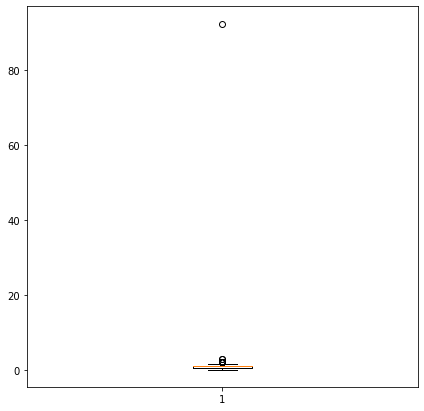

In [28]:
# Histogram plot showing the click rate distribution
plt.figure(figsize=(7,7))
plt.boxplot(merg_click_pageview_links['click_rate'])
plt.show()

Althought the distribution patterns are a bit hidden on the standard boxplot probably due to smaller values, thus the need to plot the boxplot based on log. But the boxplot reveals that there are some outliers.

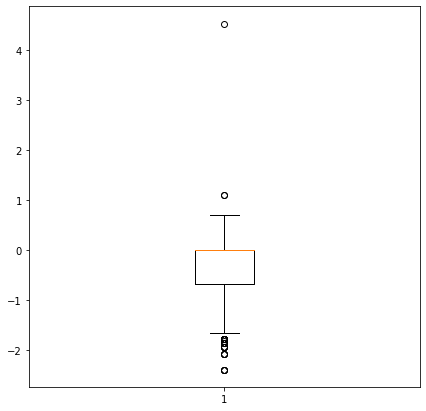

In [29]:
# plot histogram based on log of the data to have view the small values since they not so much revealing with standard boxplot
plt.figure(figsize=(7,7))
plt.boxplot(np.log(merg_click_pageview_links['click_rate']))
plt.show()

It is observed that the click rate distribution is negatively skewed. The are about two outerliers above Q2 and many outliers below Q1. This suggests that there are some links that have been clicked that have being clicked multiple times in the same pageview.

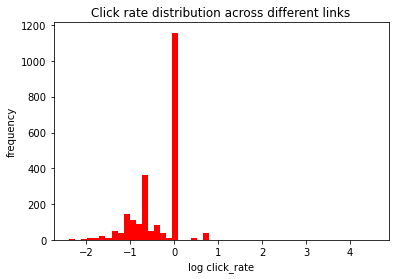

In [30]:
n_bins = 50
fig, ax = plt.subplots()
plt.title('Click rate distribution across different links')
plt.xlabel('log click_rate')
plt.ylabel('frequency')
ax.hist(np.log(merg_click_pageview_links['click_rate']), bins = n_bins, color='r')
plt.show()

The histogram also indicates that the distribution is skewed to the left (negatively skewed). Also, it is observed that there spikes at 0, which is a clickrate of 1, this implies that there are many links that have been clicked and viewd at exacly one time. The values less than 0 indicates that there are many links that have been viewed many times but clicked on fewer times.

**6. Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.**

In other to find the correlation between clicks and preview, we first Filter each of click and preview events and group by the linkid, then count. Therefore, we need to filter out the events that are either click or preview and negelect pageview since it is not of concerns

In [31]:
# filter click and preview events in traffic dataset
click_preview = traffic_data[(traffic_data['event'] =='click') | (traffic_data['event'] =='preview')]

In [32]:
click_preview.head(5)

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [33]:
# have the descibe method to have information regarding the content
#click_preview.describe().T
click_preview.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,84263,84263,84261,84261,84252,84262,84262,82036,84263
unique,2,7,206,8137,1549,2003,2155,628,2286
top,click,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,55732,12995,18461,8893,15666,15666,15666,15666,15666


In [34]:
# To get the number of clicks on each link we filter only 'click' events and group them by the 'linkid' then count.
click_links2 = click_preview[click_preview['event'] == 'click'].groupby('linkid')['event'].count().reset_index()

# Similarly to get the number of previews on each link we filter only 'previews' events and group them by the 'linkid' then count.
preview_links2 = click_preview[click_preview['event'] == 'preview'].groupby('linkid')['event'].count().reset_index()

In [35]:
# Merge the click_links2 and preview_links2 to the click and preview filtered above - click_preview
# merge click_links2 to click_preview and name it click_preview2
click_preview2 = click_preview.merge(click_links2, on = 'linkid', how='left', suffixes=('_click_preview1', '_click'))

# Merge preview_links2 to click_preview2
click_preview2 = click_preview2.merge(preview_links2, on = 'linkid', how='left')

In [36]:
click_preview2.head(3)

,event_click_preview1,date,country,city,artist,album,track,isrc,linkid,event_click,event
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1187.0,718.0


In [37]:
# Drop the null values rows
click_preview2.dropna(subset=['event_click_preview1', 'event'], inplace=True)

# rename columns for clarity
click_preview2 = click_preview2.rename(columns={'event_click_preview1':'event', 'event_click':'click', 'event':'preview'})

In [38]:
click_preview2.head(3)

,event,date,country,city,artist,album,track,isrc,linkid,click,preview
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1187.0,718.0


In [39]:
# Calculate the correlation coefficient for click and preview
click_preview2_corr = click_preview2.corr()
click_preview2_corr

,click,preview
click,1.000000,0.998713
preview,0.998713,1.000000


There is almost a perfect positive correlation between the number of clicks and previews. This is logical since a link can't be clicked with preview as well as a link can't be preview without clicking.

To examine the correlations between the categoric variables in the traffic dataset make use pd.factorize.

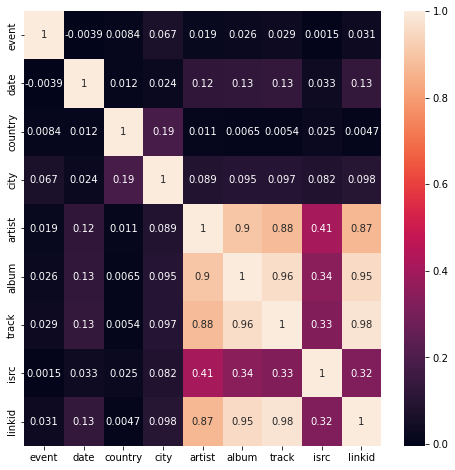

In [40]:
#traffic_data.apply(lambda x: pd.factorize(x)[0]).corr()
trafficdata_corr = traffic_data.apply(lambda x: pd.factorize(x)[0]).corr(method = 'pearson', min_periods=1)

fig, ax = plt.subplots(figsize =(8, 8))
sns.heatmap(trafficdata_corr, annot = True, ax = ax)
plt.show()

Highly positive correlation between album, artist, track and linkid is observed. Whereas there is almost no correlation between other variables.